<a href="https://colab.research.google.com/github/DevanshPatel234/FMML_Project_and_Labs/blob/main/Module%202%20Lab%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module 2: Appreciating, Interpreting and Visualizing Data

Lab 4: t-Distributed Stochastic Neighbor Embedding (t-SNE)

Name=Devansh Patel

MODULE 2 LAB 4

In [21]:
# numpy.
import numpy as np
from numpy import linalg
from numpy.linalg import norm
from scipy.spatial.distance import squareform, pdist

# sklearn.
import sklearn
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

# Random state.
RS = 20150101

# matplotlib.
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

# seaborn.
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=2.5,
                rc={"lines.linewidth": 3.5})

1797 images each of size 8 x 8 loaded using load_digits()

In [22]:
digits = load_digits()
digits.data.shape

(1797, 64)

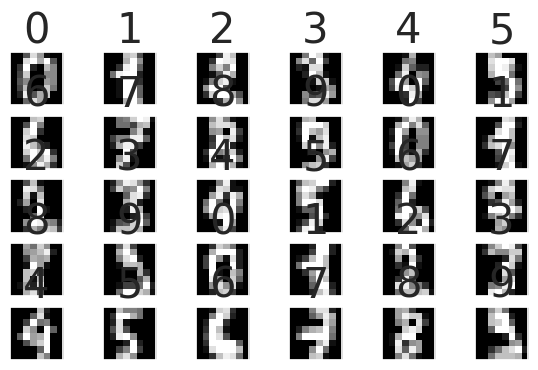

In [23]:
nrows, ncols = 5, 6
plt.figure(figsize=(7,4))
plt.gray()
for i in range(ncols * nrows):
    ax = plt.subplot(nrows, ncols, i + 1)
    ax.matshow(digits.images[i,...])
    plt.xticks([]); plt.yticks([])
    plt.title(digits.target[i])

In [24]:
# We first reorder the data points according to the handwritten numbers.
X = np.vstack([digits.data[digits.target==i]
               for i in range(10)])
y = np.hstack([digits.target[digits.target==i]
               for i in range(10)])

Now using TSNE to fit the dataset with the default values.

1.n_components : 2

2.perplexity : 30

3.n_iter : 1000

4.method : ‘barnes_hut’


In [25]:
digits_proj = TSNE(init="pca", random_state=RS).fit_transform(X)

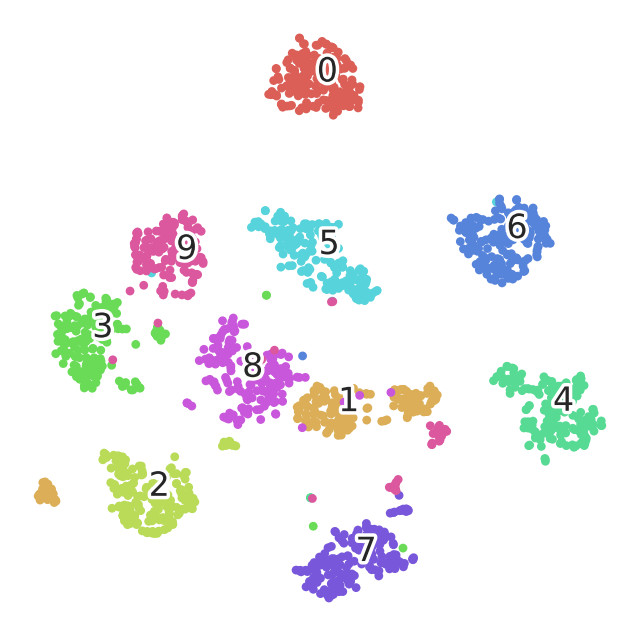

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x798fc279c940>)

In [26]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(int)])
    plt.xlim(-75, 75)
    plt.ylim(-75, 75)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    plt.show()

    return f, ax, sc

scatter(digits_proj, y)

Tweaking some of the hyperparameters to better understand their role

Changing the PERPLEXITY values

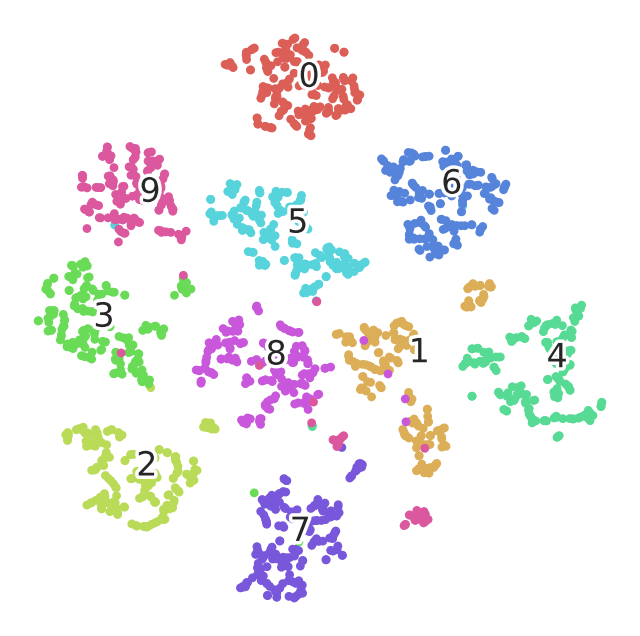

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x798fc26542e0>)

In [28]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=7).fit_transform(X)

scatter(digits_proj, y)

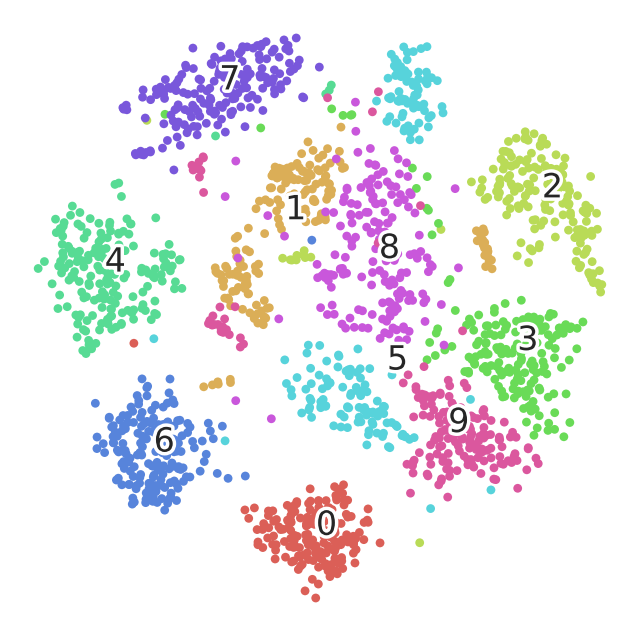

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x798fc26ae3b0>)

In [29]:
digits_proj = TSNE(init="pca", random_state=RS, perplexity=400).fit_transform(X)

scatter(digits_proj, y)

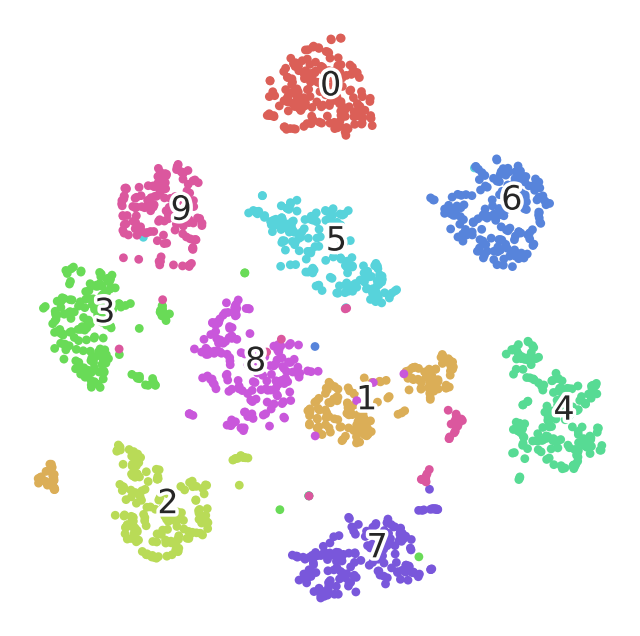

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x798fc25068c0>)

In [30]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=450).fit_transform(X)

scatter(digits_proj, y)

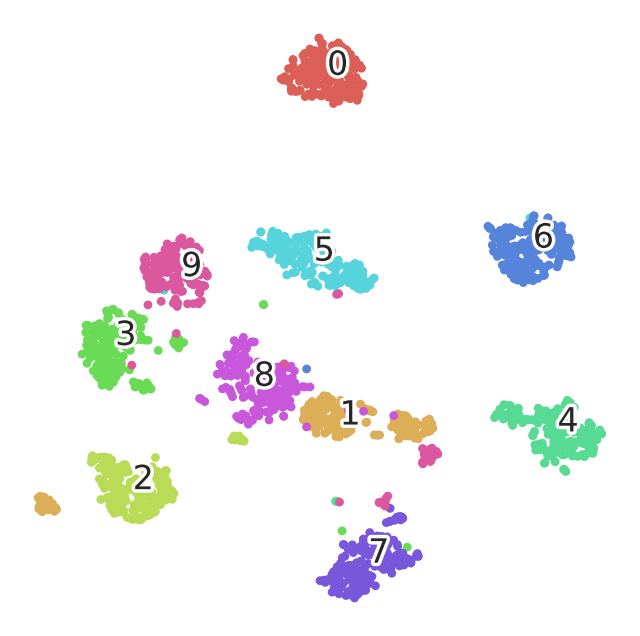

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x798fc258e350>)

In [31]:
digits_proj = TSNE(init="pca", random_state=RS, n_iter=8000).fit_transform(X)

scatter(digits_proj, y)

Changing the method to EXACT

The barnes-hut method takes O(NlogN) time, whereas the exact method takes O(N^2) time. Notice the increase in the execution time while running the cell below.

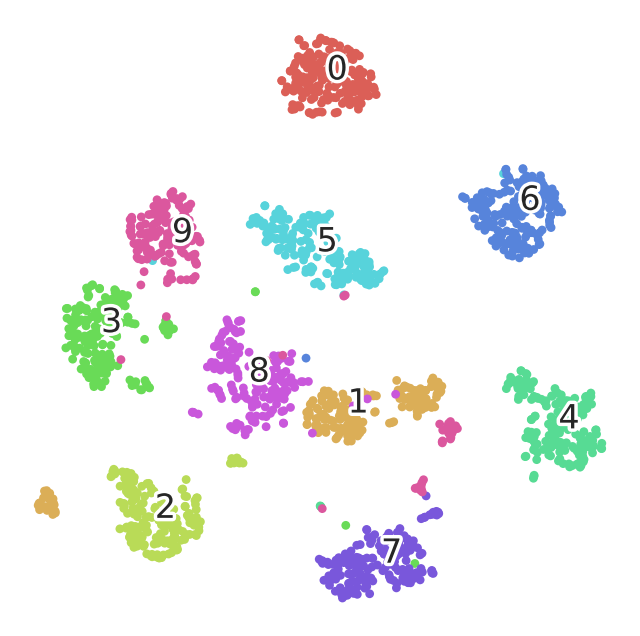

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x798fc26ac3d0>)

In [32]:
digits_proj = TSNE(init="pca", random_state=RS, method='exact').fit_transform(X)

scatter(digits_proj, y)

Exercise

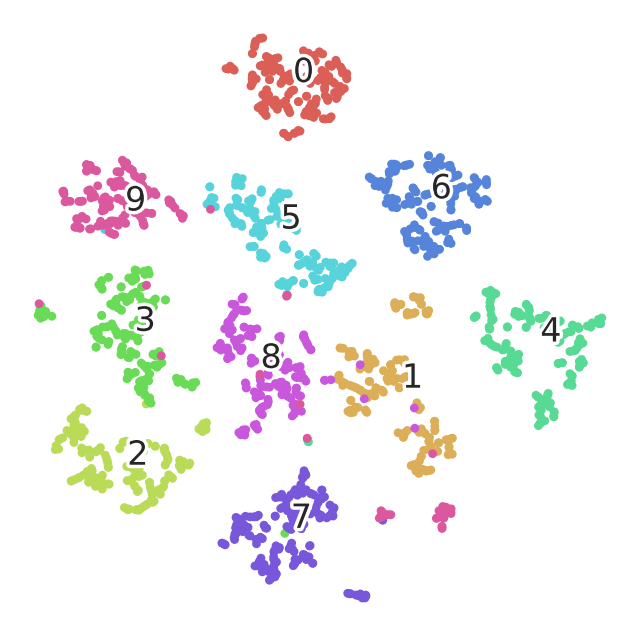

(<Figure size 800x800 with 1 Axes>,
 <Axes: >,
 <matplotlib.collections.PathCollection at 0x798fc2e842e0>)

In [33]:
###############################################################
###### MODIFY THE VALUES FOR THE HYPERPARAMETERS BELOW ########

perplexity_value = 5
number_iterations = 4000
method = "barnes_hut"

###############################################################

digits_proj = TSNE(init="pca", random_state=RS, n_iter=number_iterations, perplexity=perplexity_value, method=method).fit_transform(X)
scatter(digits_proj, y)

QUESTION:

Now that you understand t-SNE a bit better, can you point out some differences between PCA and t-SNE. What are the advantages/disadvantages of one over the other?

Pointers:

1.Which of the two algorithms is linear and which one is non-linear?

2.How does the non-linearity in one of these two algorithms help in capturing certain data sets?

3.PCA is known to keep points which were further apart in the higher dimension, far apart in the lower dimension as well. Does t-SNE do the same? Or does it try to preserve local neighbourhood?

4.Can you comment on which one of the two is computationally more expensive?


ANSWER :

Principal Component Analysis (PCA) and t-Distributed Stochastic Neighbor Embedding (t-SNE) are both dimensionality reduction techniques used in machine learning and data analysis, but they have distinct differences in their approaches and use cases.

1.Linearity vs. Non-Linearity:

a)PCA: PCA is a linear dimensionality reduction technique. It works by finding linear combinations of the original features that capture the most variance in the data. This means that PCA is effective when the underlying data relationships are linear.

b)t-SNE: t-SNE is a non-linear dimensionality reduction technique. It focuses on preserving pairwise similarities or distances between data points, making it better suited for capturing complex non-linear patterns in the data.

2.Preservation of Global vs. Local Structure:

a)PCA: PCA primarily focuses on preserving the global structure of the data. It aims to capture the directions of maximum variance, which may result in the loss of local structure.

b)t-SNE: t-SNE is designed to preserve the local structure of data. It minimizes the divergence between probability distributions over pairs of data points in the high-dimensional space and the low-dimensional space, emphasizing the relationships between nearby data points.

3.Sensitivity to Outliers:

a)PCA: PCA is sensitive to outliers in the data because it seeks to maximize variance, and outliers can have a significant impact on the covariance matrix.

b)t-SNE: t-SNE is less sensitive to outliers since it primarily focuses on preserving pairwise similarities, and outliers have less influence on these local relationships.

4.Interpretability:

a)PCA: PCA provides interpretable results in terms of principal components, which are linear combinations of the original features. These components have clear meaning, often related to the most significant sources of variance in the data.

b)t-SNE: t-SNE does not produce easily interpretable components. Its primary purpose is visualization and capturing local patterns, making it less suited for extracting meaningful features.

5.Computational Complexity:

a)PCA: PCA is computationally efficient and can be applied to high-dimensional datasets because it involves solving the eigenvalue problem, which can be done relatively quickly.

b)t-SNE: t-SNE can be computationally expensive, especially for large datasets, as it involves pairwise computations and optimization over the high-dimensional space.

6.Use Cases:

a)PCA: PCA is often used for data preprocessing, noise reduction, and feature extraction. It is also employed in some cases for visualization, although it emphasizes global patterns.

b)t-SNE: t-SNE is commonly used for data visualization, particularly when exploring and visualizing high-dimensional data with complex local relationships, such as in natural language processing and image analysis.


The non-linearity in algorithms like t-Distributed Stochastic Neighbor Embedding (t-SNE) helps in capturing certain datasets by allowing them to effectively model and represent complex, non-linear relationships among data points. Here's how non-linearity in t-SNE benefits the capture of specific data sets:

1.Complex Data Structures:

Many real-world datasets exhibit intricate, non-linear relationships between data points. Linear methods like Principal Component Analysis (PCA) may struggle to capture these intricate patterns. For example, in natural language processing, data points representing words or documents can have complex, non-linear relationships based on their semantics, which t-SNE can capture effectively.

2.Preservation of Local Structure:

t-SNE is specifically designed to preserve the local structure of data. It focuses on maintaining pairwise similarities between data points. This means that data points that are close to each other in the high-dimensional space will remain close in the low-dimensional space. This is crucial for datasets where the local relationships are more important than the global structure. For instance, in image data, objects or patterns within an image may have complex local interactions, and t-SNE can help preserve these relationships.

3.Cluster Separation:

t-SNE is effective at separating clusters of data points in a non-linear fashion. In datasets where distinct groups or clusters of data points are not easily separable by linear methods, t-SNE can create a visualization or lower-dimensional representation where these clusters are well-separated. This is useful in various applications, such as clustering and classification tasks.

4.Visualization:

t-SNE is often used for data visualization, allowing analysts and researchers to explore high-dimensional data in a way that reveals underlying structures and relationships. Its non-linearity helps in creating visualizations that highlight local patterns and groupings, making it easier to interpret complex datasets.

5.Noise Tolerance:

t-SNE is less sensitive to outliers and noise in the data compared to linear methods like PCA. Outliers and noisy data points have less influence on the preservation of pairwise similarities, making t-SNE more robust in situations where the data contains irregularities.



It-Distributed Stochastic Neighbor Embedding (t-SNE) is generally computationally more expensive than Principal Component Analysis (PCA).